In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df = pd.read_csv('/content/Student_performance_data _.csv')

#View first 5 rows
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
# Dataset information
df.info()

#Statistical Summary
df.describe()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


Data Cleaning

In [6]:
# Fill numerical missing values with mean(Handle Missing Values)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Remove Duplicates
df.drop_duplicates(inplace=True)

In [8]:
# Encode Categorical Variables
le = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
  df[col] = le.fit_transform(df[col])

Exploratory Data Analysis (EDA)

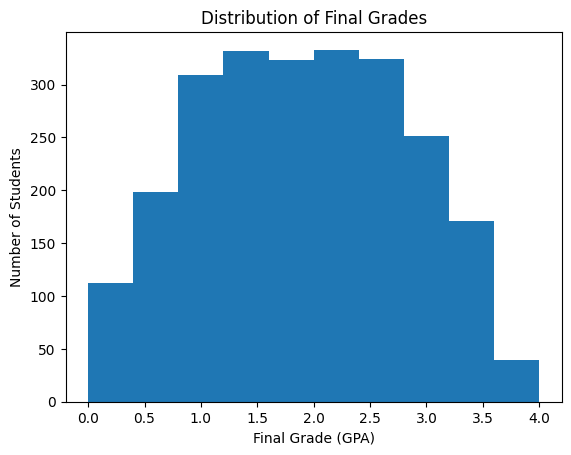

In [10]:
# Grade Distribution
plt.hist(df['GPA'], bins=10)
plt.xlabel("Final Grade (GPA)")
plt.ylabel("Number of Students")
plt.title("Distribution of Final Grades")
plt.show()

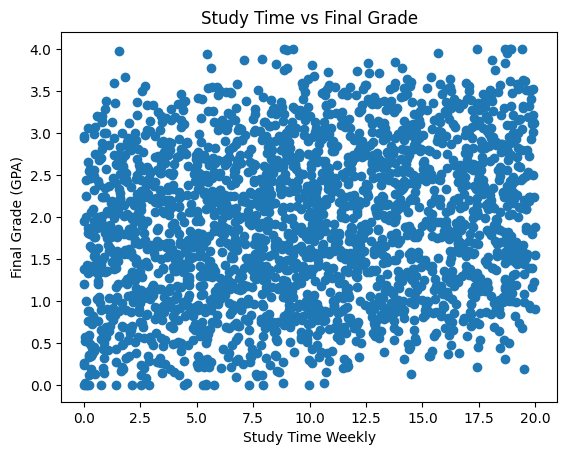

In [13]:
# Study Time vs Final Grade
plt.scatter(df['StudyTimeWeekly'], df['GPA'])
plt.xlabel("Study Time Weekly")
plt.ylabel("Final Grade (GPA)")
plt.title("Study Time vs Final Grade")
plt.show()

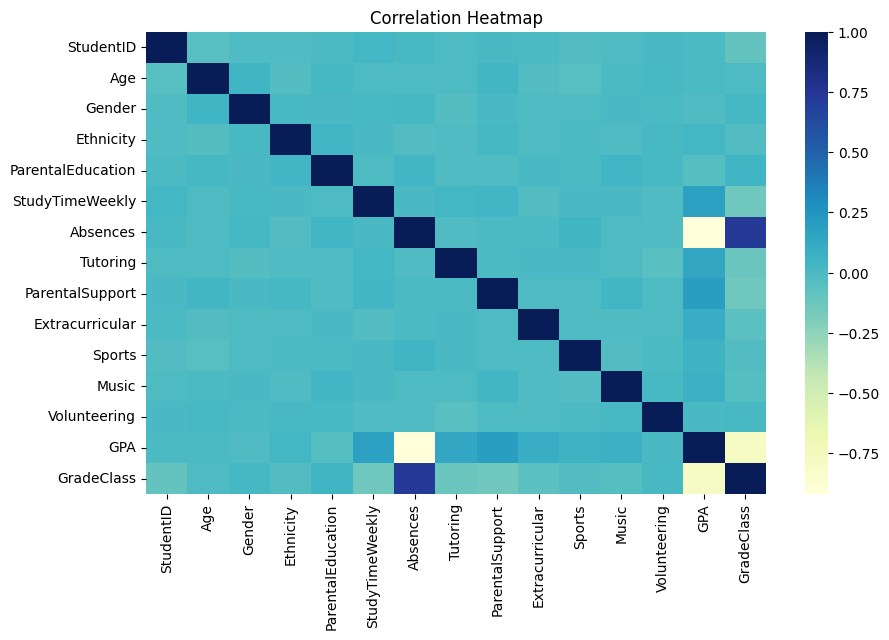

In [15]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# Feature Selection
X = df.drop('GPA', axis=1)
y = df['GPA']

In [18]:
# Train- Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [19]:
# Train Model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Make Predictions
y_pred = model.predict(X_test)

In [21]:
# Model Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))



MAE: 0.15097032927685405
MSE: 0.03585257707138883
RMSE: 0.18934776753737773
R2 Score: 0.9566438952061618


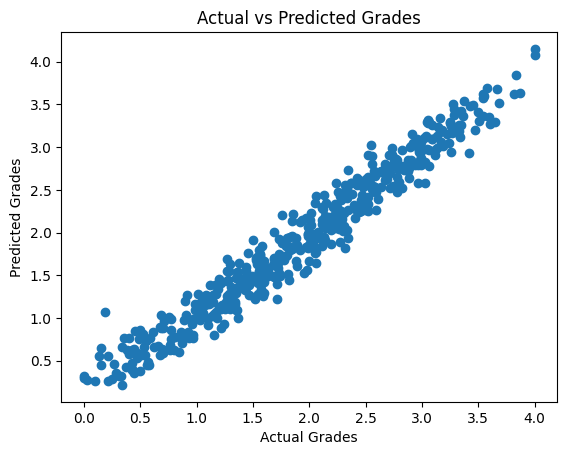

In [22]:
# Actual vs Predicted Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs Predicted Grades")
plt.show()
